In [18]:
import open3d as o3d
import numpy as np
import matplotlib.cm as cm
from utils.utils import read_semantickitti_yaml

def visualize_label_file(file_path):
    """
    Reads a 3D label tensor from a file, assigns a unique color to each
    label category (except 0), and visualizes it as a point cloud.

    Args:
        file_path (str): The path to the .label file.
    """
    # 1. Define tensor properties
    # The shape of the tensor (e.g., width, height, depth)
    tensor_shape = (256, 256, 32)
    # The data type of the labels, often int32 or uint32
    data_type = np.uint16

    # 2. Load the label data
    try:
        labels = np.fromfile(file_path, dtype=data_type)
        # labels[labels == 255] = 19
        labels = labels.reshape(tensor_shape)
        print(f"Successfully loaded and reshaped data from {file_path}")
    except (IOError, ValueError) as e:
        print(f"Error reading or reshaping file: {e}")
        print("Please ensure the file path and tensor dimensions are correct.")
        return
    map_lut, learning_map_inv = read_semantickitti_yaml()
    print(np.unique(labels).shape)
    labels = np.array([map_lut[label] for label in labels])
    # 3. Filter out air (category 0) and get coordinates
    # np.argwhere finds the indices (x, y, z) of all non-zero elements
    points = np.argwhere(labels > 0)
    
    # If there are no points to visualize, exit
    if points.shape[0] == 0:
        print("No non-air voxels found to visualize.")
        return

    # Get the label value for each of those points
    point_labels = labels[labels > 0]
    
    # 4. Create a color map for the categories
    # We use 'tab20', a colormap with 20 distinct colors.
    # We create a map for 20 categories to ensure consistent coloring.
    num_categories = 20
    # The cmap returns RGBA, so we slice off the alpha channel 'A' -> [:3]
    color_map = cm.get_cmap("tab20", num_categories).colors[:, :3]

    # Map each point's label (1-19) to its corresponding color
    # We use (point_labels - 1) because labels are 1-based and array indices are 0-based.
    point_colors = color_map[point_labels -1]

    # 5. Create and visualize the Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(point_colors)

    print(f"Visualizing {len(points)} points...")
    o3d.visualization.draw_geometries([pcd], window_name="Voxel Visualization")
    

if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace with the actual path to your label file
    label_file = 'exp/gen/sample/4.label'
    visualize_label_file(label_file)

Successfully loaded and reshaped data from exp/gen/sample/4.label
(15,)
Visualizing 164661 points...


/tmp/ipykernel_86461/2071987140.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab20", num_categories).colors[:, :3]


In [12]:
def inspect_file(path):
    """
    Reads a binary file with different data types to help diagnose its format.
    """
    print(f"--- Inspecting File: {path} ---")

    try:
        # Read the raw bytes first
        with open(path, 'rb') as f:
            raw_bytes = f.read()
        print(f"File size: {len(raw_bytes)} bytes\n")
    except IOError as e:
        print(f"Error reading file: {e}")
        return

    # --- Test Case 1: Standard int32 ---
    try:
        data_int32 = np.frombuffer(raw_bytes, dtype=np.int32)
        print("## Reading as np.int32 (Standard)")
        print(f"Total elements found: {data_int32.size}")
        print(f"Number of unique values: {len(np.unique(data_int32))}")
        print(f"First 10 values: {data_int32[:10]}\n")
    except Exception as e:
        print(f"Could not read as int32: {e}\n")


    # --- Test Case 2: float32 ---
    try:
        data_float32 = np.frombuffer(raw_bytes, dtype=np.float32)
        print("## Reading as np.float32")
        print(f"Total elements found: {data_float32.size}")
        print(f"Number of unique values: {len(np.unique(data_float32))}")
        print(f"First 10 values: {np.round(data_float32[:10], 5)}\n")
    except Exception as e:
        print(f"Could not read as float32: {e}\n")
        
    # --- Test Case 3: int16 ---
    try:
        data_int16 = np.frombuffer(raw_bytes, dtype=np.int16)
        print("## Reading as np.int16")
        print(f"Total elements found: {data_int16.size}")
        print(f"Number of unique values: {len(np.unique(data_int16))}")
        print(f"First 10 values: {data_int16[:10]}\n")
    except Exception as e:
        print(f"Could not read as int16: {e}\n")
inspect_file('exp/gen/sample/2.label')

--- Inspecting File: exp/gen/sample/2.label ---
File size: 4194304 bytes

## Reading as np.int32 (Standard)
Total elements found: 1048576
Number of unique values: 66
First 10 values: [      0       0 3145728       0       0       0       0       0       0
       0]

## Reading as np.float32
Total elements found: 1048576
Number of unique values: 66
First 10 values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

## Reading as np.int16
Total elements found: 2097152
Number of unique values: 12
First 10 values: [ 0  0  0  0  0 48  0  0  0  0]



Value 0: 915462 times
Value 18: 766 times
Value 40: 4968 times
Value 44: 897 times
Value 48: 2012 times
Value 50: 662 times
Value 51: 575 times
Value 70: 12226 times
Value 72: 683 times
Value 1179648: 419 times
Value 1179666: 3211 times
Value 1179692: 52 times
Value 1179699: 317 times
Value 2621440: 2967 times
Value 2621480: 6796 times
Value 2883584: 715 times
Value 2883624: 325 times
Value 2883628: 1471 times
Value 2883632: 27 times
Value 3145728: 3868 times
Value 3145768: 73 times
Value 3145776: 3949 times
Value 3145798: 604 times
Value 3276800: 330 times
Value 3276850: 1351 times
Value 3276870: 149 times
Value 3276872: 70 times
Value 3342336: 104 times
Value 3342354: 76 times
Value 3342380: 269 times
Value 3342384: 552 times
Value 3342387: 2855 times
Value 4587520: 9653 times
Value 4587568: 1163 times
Value 4587570: 92 times
Value 4587571: 20 times
Value 4587590: 65472 times
Value 4587592: 598 times
Value 4718592: 2071 times
Value 4718664: 706 times


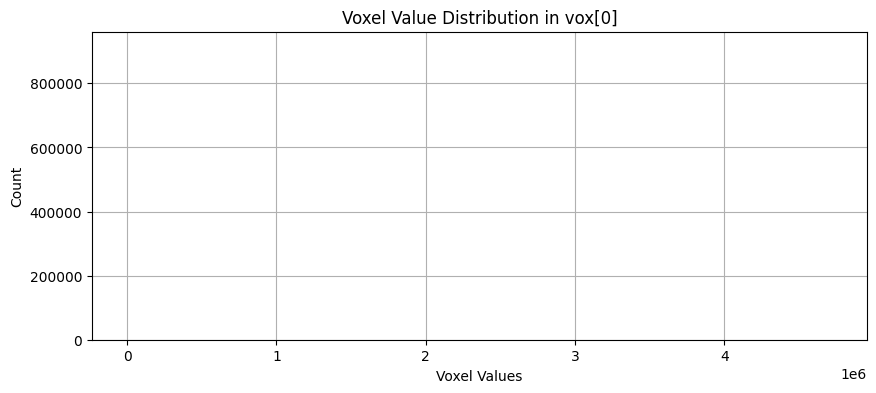

In [13]:
data_type = np.int32
label_file = 'exp/gen/sample/0.label'
labels = np.fromfile(label_file, dtype=data_type)
import matplotlib.pyplot as plt
import torch
labels = torch.tensor(labels)
unique_vals, counts = torch.unique(labels, return_counts=True)
for val, count in zip(unique_vals.tolist(), counts.tolist()):
    print(f"Value {val}: {count} times")
vals = unique_vals.cpu().numpy()
cnts = counts.cpu().numpy()

plt.figure(figsize=(10, 4))
plt.bar(vals, cnts)
plt.xlabel("Voxel Values")
plt.ylabel("Count")
plt.title("Voxel Value Distribution in vox[0]")
plt.grid(True)
plt.show()

In [11]:
import open3d as o3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# IMPORTANT: Change this to the actual path of your .label file
FILE_PATH = 'exp/gen/sample/0.label'
TENSOR_SHAPE = (256, 256, 16)
DATA_TYPE = np.int32
# --- END CONFIGURATION ---

def main():
    """
    Loads a .label file to visualize as a 3D point cloud and then
    analyzes the label distribution with a table and chart.
    """
    # 1. Load the data from the file
    print(f"--> Loading data from '{FILE_PATH}'...")
    try:
        labels = np.fromfile(FILE_PATH, dtype=DATA_TYPE)
        labels = labels.reshape(TENSOR_SHAPE)
    except (IOError, ValueError) as e:
        print(f"Error: Could not read or reshape the file. Make sure FILE_PATH is correct.\n{e}")
        return

    # 2. Visualize the 3D Point Cloud (excluding air)
    print("--> Preparing 3D visualization...")
    
    # Get coordinates and category for non-air voxels
    points = np.argwhere(labels > 0)
    
    if points.shape[0] == 0:
        print("No non-air data to visualize or analyze. Exiting.")
        return
        
    point_labels = labels[labels > 0]

    # Map labels to colors
    # Using tab20 colormap for distinct colors
    color_map = plt.cm.get_cmap("tab20").colors
    point_colors = color_map[(point_labels - 1) % len(color_map)]

    # Create and display Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(point_colors)

    print("--> Showing 3D point cloud. Close the window to continue to the analysis.")
    o3d.visualization.draw_geometries([pcd], window_name="Label Visualization")

    # 3. Analyze Label Distribution
    print("\n--> Analyzing label distribution...")
    unique_labels, counts = np.unique(labels[labels > 0], return_counts=True)
    
    # Display counts in a table
    df = pd.DataFrame({'Label': unique_labels, 'Voxel Count': counts})
    print("\n--- Voxel Counts per Label ---")
    print(df.to_string(index=False))

    # Create and save a bar chart
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.bar(df['Label'], df['Voxel Count'], color=plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(df))))
    ax.set_title('Label Distribution', fontsize=16)
    ax.set_xlabel('Label')
    ax.set_ylabel('Voxel Count')
    ax.set_xticks(df['Label'])
    plt.tight_layout()
    plt.savefig('label_analysis_chart.png')
    
    print("\n--> Analysis complete. Chart saved as 'label_analysis_chart.png'. ✨")


if __name__ == '__main__':
    main()

--> Loading data from 'exp/gen/sample/0.label'...
--> Preparing 3D visualization...


/tmp/ipykernel_83157/2131964662.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20").colors


TypeError: only integer scalar arrays can be converted to a scalar index